In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tqdm import tqdm, trange

from SGA import SGA

## Zadanie 2.
Rozszerz algorytm ewolucyjny dodając lub zmieniając operatory krzyżowania i mutacji (według własnych pomysłów, można też sprawdzić popularne w literaturze tematu operatory OX, CX, PBX, OBX, PPX, LCSX, LOX). Przeanalizuj działanie nowego algorytmu i otrzymane wyniki.

In [2]:
def OX(ind1, ind2, separator_no=2):
    new_ind1, new_ind2 = ind1.copy(), ind2.copy()
    idxs = sorted(np.random.choice(len(ind1), separator_no, replace=False))
    
    group = np.random.choice(separator_no-1)
    start, end = idxs[group], idxs[group+1]
    
    ind1_seq = np.append(new_ind1[end:], new_ind1[:end])
    ind2_seq = np.append(new_ind2[end:], new_ind2[:end])
    
    to_put_in1 = list(filter(lambda x: x not in new_ind1[start:end], ind2_seq))
    to_put_in2 = list(filter(lambda x: x not in new_ind2[start:end], ind1_seq))
    
    for i, idx in enumerate(np.append(np.arange(end, len(ind1)), np.arange(start))):
        new_ind1[idx] = to_put_in1[i]
        new_ind2[idx] = to_put_in2[i]
    return new_ind1, new_ind2

In [13]:
def LOX(ind1, ind2, separator_no=2):
    new_ind1, new_ind2 = ind1.copy(), ind2.copy()
    idxs = sorted(np.random.choice(len(ind1), separator_no, replace=False))
    
    group = np.random.choice(separator_no-1)
    start, end = idxs[group], idxs[group+1]
    
    ind1_seq = np.append(new_ind1[end:], new_ind1[:end])
    ind2_seq = np.append(new_ind2[end:], new_ind2[:end])
    
    to_put_in1 = list(filter(lambda x: x not in new_ind1[start:end], ind2_seq))
    to_put_in2 = list(filter(lambda x: x not in new_ind2[start:end], ind1_seq))
    
    i = 0
    for idx in range(len(ind1)):
        if start <= idx < end:
            continue
        new_ind1[idx] = to_put_in1[i]
        new_ind2[idx] = to_put_in2[i]
        i += 1
    return new_ind1, new_ind2

In [4]:
def PMX(ind1, ind2, separator_no=2):
    new_ind1, new_ind2 = ind1.copy(), ind2.copy()
    idxs = sorted(np.random.choice(len(ind1), separator_no, replace=False))
    
    group = np.random.choice(separator_no-1)
    start, end = idxs[group], idxs[group+1]
    
    tmp = ind1[start:end].copy()
    ind1[start:end] = ind2[start:end]
    ind2[start:end] = tmp
    
    for i in range(len(ind1)):
        if start <= i < end:
            continue
            
        while ind1[i] in ind1[start:end]:
            # get elem from the other ind
            idx_of_elem = np.nonzero(ind1[start:end] == ind1[i])[0][0]
            ind1[i] = ind2[start+idx_of_elem]
        
        while ind2[i] in ind2[start:end]:
            # get elem from the other ind
            idx_of_elem = np.nonzero(ind2[start:end] == ind2[i])[0][0]
            ind2[i] = ind1[start+idx_of_elem]

    return ind1, ind2

In [5]:
def reverse_sequence_mutation(p, *args):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [6]:
def tsp_objective_function(p, dist):
    s = 0.0
    for i in range(n):
        s += dist[p[i-1], p[i]]
    return s

In [7]:
n = 200

data = open('data/kroA200.tsp').read()
coords = []
for row in data.split('\n')[6:]:
    coords.extend(row.split()[1:])
coords = np.array(list(map(int, coords)))
coords = coords.reshape(n, 2)

dists = np.empty((n, n))
for i in range(n):
    for j in range(n):
        dists[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

In [8]:
N = 5
number_of_iterations = 250

In [9]:
ox_mean_costs = np.zeros((N, number_of_iterations))

for i in trange(N, position=0, leave=True):
    sga = SGA(population_size=500, chromosome_length=n, crossover_func=OX, 
              objective_func=tsp_objective_function,distance_matrix=dists, 
              mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
              number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
              number_of_iterations=number_of_iterations)

    sga.run()
    ox_mean_costs[i] = sga.mean_costs

100%|██████████| 5/5 [11:27<00:00, 137.50s/it]


In [14]:
lox_mean_costs = np.zeros((N, number_of_iterations))

for i in trange(N, position=0, leave=True):
    sga = SGA(population_size=500, chromosome_length=n, crossover_func=LOX, 
              objective_func=tsp_objective_function,distance_matrix=dists, 
              mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
              number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
              number_of_iterations=number_of_iterations)

    sga.run()
    lox_mean_costs[i] = sga.mean_costs

100%|██████████| 5/5 [10:30<00:00, 126.17s/it]


In [15]:
pmx_mean_costs = np.zeros((N, number_of_iterations))

for i in trange(N, position=0, leave=True):
    sga = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, 
              objective_func=tsp_objective_function,distance_matrix=dists, 
              mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
              number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
              number_of_iterations=250)

    sga.run()
    pmx_mean_costs[i] = sga.mean_costs

100%|██████████| 5/5 [08:49<00:00, 105.92s/it]


Best of:
	OX:	78365.0, 
	PMX:	71949.0
	LOX:	100705.0


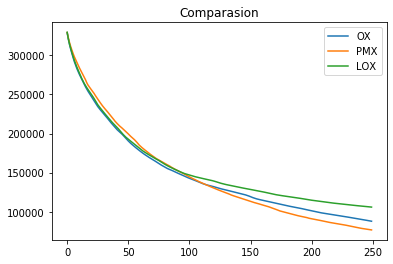

In [17]:
print(f'Best of:\n\tOX:\t{round(ox_mean_costs.min())}, \n\tPMX:\t{round(pmx_mean_costs.min())}\n\tLOX:\t{round(lox_mean_costs.min())}')

plt.title('Comparasion')
plt.plot(ox_mean_costs.mean(axis=0), label='OX')
plt.plot(pmx_mean_costs.mean(axis=0), label='PMX')
plt.plot(lox_mean_costs.mean(axis=0), label='LOX')
plt.legend()
plt.show()